In [1]:
import os
import glob
import csv

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

mpl.rcParams['figure.figsize'] = (20, 8)
mpl.rcParams['axes.grid'] = False
plt.style.use('seaborn-darkgrid')


C:\Users\Owner\anaconda3\envs\Tensorflow210\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Owner\anaconda3\envs\Tensorflow210\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\Owner\anaconda3\envs\Tensorflow210\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Owner\anaconda3\envs\Tensorflow210\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
data_2 = pd.read_csv('../output/csi_data.csv')
# checking our dataframe once again
data_2 = data_2.drop([data_2.columns[0]], axis='columns')
data_2.head()


,sub1,sub2,sub3,sub4,sub5,sub6,sub7,sub8,sub9,sub10,...,sub22,sub23,sub24,sub25,sub26,sub27,sub28,sub29,sub30,label
0,21.095023,26.305893,29.068884,30.000000,31.827661,32.000000,33.301652,32.140317,33.015148,33.955854,...,33.241540,33.301652,33.060551,31.144823,30.066593,28.425341,26.476405,22.825424,19.104973,0
1,18.384776,23.769729,25.495098,27.073973,28.017851,28.861739,29.154759,29.410882,29.068884,29.410882,...,30.066593,30.479501,30.265492,28.017851,26.925824,26.000000,23.853721,21.023796,17.464249,0
2,20.615528,26.019224,28.017851,30.083218,31.304952,32.310989,33.105891,32.893768,34.885527,34.205263,...,33.105891,31.953091,31.780497,31.384710,28.792360,28.301943,27.294688,22.627417,20.248457,0
3,20.808652,27.073973,29.068884,30.413813,31.906112,32.984845,32.449961,33.734256,34.409301,34.234486,...,33.421550,33.136083,33.421550,31.256999,30.805844,29.120440,26.400758,23.706539,20.000000,0
4,21.095023,26.305893,29.000000,30.149627,31.622777,32.557641,33.837849,33.541020,33.600595,34.234486,...,33.015148,32.388269,33.015148,31.400637,29.681644,28.460499,26.570661,22.472205,19.723083,0


In [3]:
X_data = data_2.iloc[:, 1:]
target = data_2.iloc[:, -1]


In [4]:
x_train, x_test, y_train, y_test = train_test_split(
    X_data, target, test_size=0.20, random_state=120, shuffle=False)  # false for timeseries
print('X_train.shape: ', x_train.shape)
print('X_test.shape: ', x_test.shape)


X_train.shape:  (838860, 30)
X_test.shape:  (209715, 30)


In [5]:
# Scaling
# scaler = MinMaxScaler()
# data_scaled = scaler.fit_transform(X_data)
# data_scaled
# print(data_scaled)
standardizer = StandardScaler()
data_scaled = standardizer.fit_transform(X_data)
data_scaled
print(data_scaled)


[[-0.4377487  -0.22671384 -0.21263364 ... -0.23467084 -0.30106064
  -0.4431347 ]
 [-0.93691384 -0.97006184 -0.88188411 ... -0.77519258 -0.87058014
  -0.4431347 ]
 [-0.49417063 -0.44532869 -0.19359977 ... -0.29407672  0.09585938
  -0.4431347 ]
 ...
 [-0.49417063 -0.49004329 -0.52469401 ...  0.96762047  1.05850306
  -0.4431347 ]
 [-0.53594503 -0.64165559 -0.59697916 ...  0.56628035  0.98275555
  -0.4431347 ]
 [-0.41535134 -0.40095457 -0.48884897 ...  0.70043239  0.70384589
  -0.4431347 ]]


In [6]:
x_test_scaled = standardizer.transform(x_test)
x_test_scaled


array([[-0.48283662, -0.59574676, -0.70283868, ..., -0.89768049,
        -0.87058014, -0.4431347 ],
       [ 0.10606021,  0.09053491,  0.10408166, ..., -0.10446815,
         0.36499109, -0.4431347 ],
       [ 0.29260093,  0.01530456,  0.08949137, ..., -0.07871806,
        -0.01646622, -0.4431347 ],
       ...,
       [-0.49417063, -0.49004329, -0.52469401, ...,  0.96762047,
         1.05850306, -0.4431347 ],
       [-0.53594503, -0.64165559, -0.59697916, ...,  0.56628035,
         0.98275555, -0.4431347 ],
       [-0.41535134, -0.40095457, -0.48884897, ...,  0.70043239,
         0.70384589, -0.4431347 ]])

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', dtype='float64'),
    tf.keras.layers.Dense(256, activation='relu', dtype='float64'),
    tf.keras.layers.Dense(256, activation='relu', dtype='float64'),
    tf.keras.layers.Dense(1, activation='sigmoid', dtype='float64')
])


In [8]:
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)


In [9]:
history = model.fit(x_train, y_train, epochs=1, batch_size=50)


16778/16778 [==============================] - 26s 2ms/step - loss: 0.0449 - accuracy: 0.9893 - precision: 0.9901 - recall: 0.9361


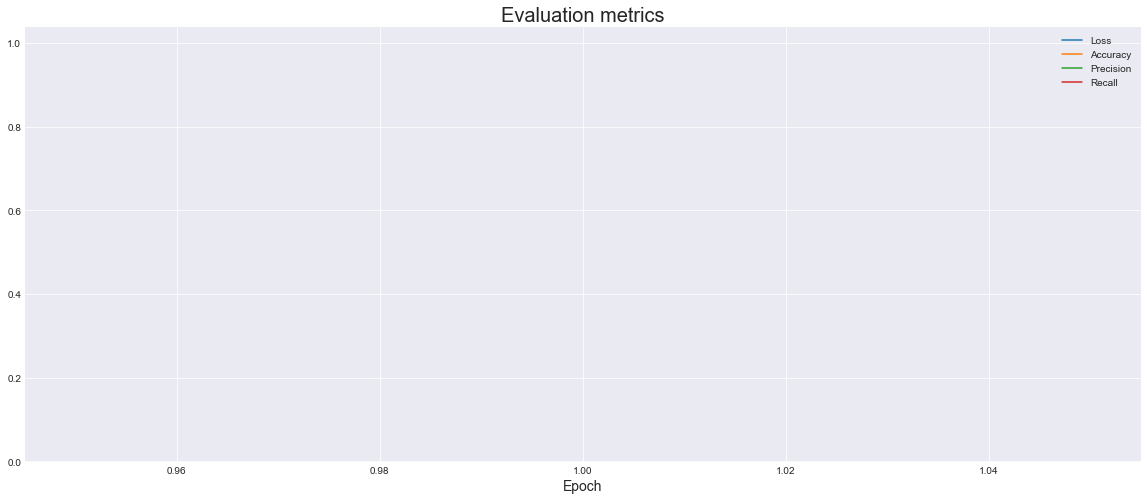

In [11]:
plt.plot(
    np.arange(1, 2),
    history.history['loss'], label='Loss'
)
plt.plot(
    np.arange(1, 2),
    history.history['accuracy'], label='Accuracy'
)
plt.plot(
    np.arange(1, 2),
    history.history['precision'], label='Precision'
)
plt.plot(
    np.arange(1, 2),
    history.history['recall'], label='Recall'
)
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend()


In [12]:
predictions = model.predict(x_test_scaled)

In [13]:
prediction_classes = [
    1 if prob > 0.5 else 0 for prob in np.ravel(predictions)
]


In [14]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, prediction_classes))


[[152872   7693]
 [     0  49150]]


In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(f'Accuracy: {accuracy_score(y_test, prediction_classes):.2f}')
print(f'Precision: {precision_score(y_test, prediction_classes):.2f}')
print(f'Recall: {recall_score(y_test, prediction_classes):.2f}')

Accuracy: 0.96
Precision: 0.86
Recall: 1.00


In [16]:
x_train = x_train.values.reshape(838860, 30, 1)
x_test = x_test.values.reshape(209715, 30, 1)


In [27]:
# Set up parameters
n_steps = 30
n_features = 1
epochs = 2

# Create a traditional RNN network
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(64, input_shape=(n_steps, n_features),  return_sequences=True,))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 30, 64)            16896     
_________________________________________________________________
dense_6 (Dense)              (None, 30, 32)            2080      
_________________________________________________________________
dense_7 (Dense)              (None, 30, 1)             33        
Total params: 19,009
Trainable params: 19,009
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
              loss='binary_crossentropy', metrics=['BinaryAccuracy'])

In [29]:
model_RNN = model.fit(x_train, y_train, epochs=epochs, batch_size=100)


Epoch 1/2
8389/8389 [==============================] - 95s 11ms/step - loss: 0.3928 - binary_accuracy: 0.8602
Epoch 2/2
8389/8389 [==============================] - 95s 11ms/step - loss: 0.3614 - binary_accuracy: 0.8658
